# Linear Regression

Small linear regression sample implementation.
For this example we are using the Bitcoin Prices in a Monthly basis as the **dependant** variable. i.e., the variable we want to predict. 
And we use the Ethereum Prices in a Montly basis as the **independant** variable. i.e., the variable we are using **to** predict the Bitcoin price. 

> DISCLAIMER: this is simplified given that yahoo offers good quality data. Usually you need more steps to clean and wrangle data.

## 1. Import libraries

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## 2. Load the data from csv files.

In [11]:
# Ingest
## Data paths.
DATA = "assets/BTC-USD.csv" 
DATA1 = "assets/ETH-USD.csv"

## Make pandas read the data.
df1 = pd.read_csv(DATA, index_col="Date", parse_dates=True).sort_index(ascending=True)
df2 = pd.read_csv(DATA1, index_col="Date", parse_dates=True).sort_index(ascending=True)

Ingests the data fetched from Yahoo Finance (The data has no blank values).
During the import, the data is formated to a time series by setting the Dates as the index. The index is then sorted as ascend given that for linear regresions these need to be from older to newest.

In [12]:
df1.head()
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,107.147682,165.549622,102.934563,136.746246,136.746246,101430995445
2019-03-01,136.836243,149.613235,125.402702,141.514099,141.514099,138882123600
2019-04-01,141.465485,184.377853,140.737564,162.166031,162.166031,204556824026
2019-05-01,162.186554,287.201630,159.660217,268.113556,268.113556,314349041886
2019-06-01,268.433350,361.398682,229.257431,290.695984,290.695984,270589672710


## 3. Preprocess the data for the regression.

In [13]:
## Get the correlation
df1["Adj Close"].corr(df2["Adj Close"])

0.9184047915160264

In [14]:
## Get necesary predictive values only.
# Use double brackets to avoid sending pandas.core.series.Series instead of DataFrame
dfx = df2[["Adj Close"]]  # Load the Etherum price as x (Independant)
dfy = df1[["Adj Close"]]  # Load the Bitcoin price as y (Dependant)

Viewing the data shows the varying measures for the exchange prices. We need to **drop** all of them except the "Adj Close".

Notice that unlike the correlation. We fetch the columns using **double brackets**. 
This is to avoid getting errors in scikit-learn given that we are using 1 variable as preditor instead of a multy plexed array (a matrix).

## 4. Split the sets

In [15]:
train_size = 0.8  # use 80 percent to train the regression
if dfx.shape[0] != dfy.shape[0]:
    print("Sample Sizes ERROR")
    exit
x_train_size = round(dfx.shape[0] * train_size)  # We only need the rows.
x_test_size = x_train_size
y_train_size = round(dfx.shape[0] * train_size)  # We only need the rows.
y_test_size = y_train_size

x_train, x_test = dfx.iloc[:x_train_size], dfx.iloc[x_test_size:]
y_train, y_test = dfy.iloc[:y_train_size], dfy.iloc[y_test_size:]

Why not use all the series for the regression?
To avoid overfitting. 

## 5. Regression

In [16]:
# Regression
regressor = LinearRegression()
regressor.fit(X=x_train, y=y_train)
regressor.coef_

array([[12.38075347]])

Create a Linear Regression instance and then fit it to the linear regression we need.  
**x** is the Ethereum price.  
**y** is the Bitcoin price.  

## 6. Predict 

In [17]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[27166.4563642 ]
 [29842.27088754]
 [30522.0017507 ]
 [30487.4121169 ]
 [31218.60049905]
 [30264.95301762]
 [27658.51725297]
 [27974.50757146]
 [29773.39538172]
 [32696.45621372]
 [35530.59687719]
 [35894.03668097]]


Create an array with the predictions for the **test (Validation)** set.  
Print the predictions. 

## 7. Plot.

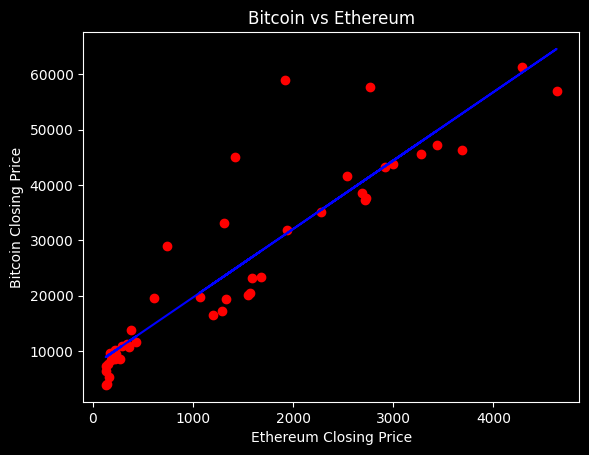

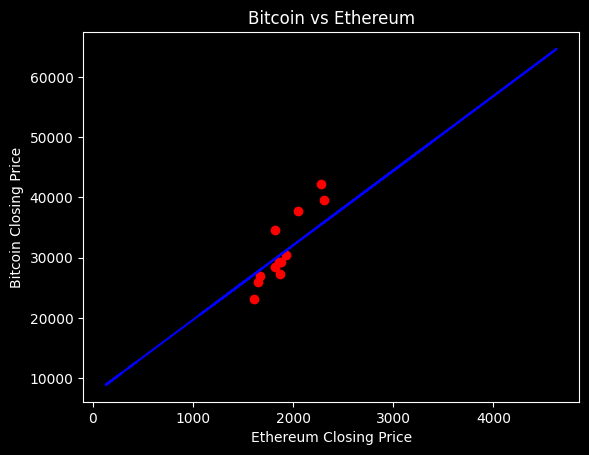

In [18]:
# Training Sets
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.title("Bitcoin vs Ethereum")
plt.xlabel("Ethereum Closing Price")
plt.ylabel("Bitcoin Closing Price")
plt.show()


# Test set
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.title("Bitcoin vs Ethereum")
plt.xlabel("Ethereum Closing Price")
plt.ylabel("Bitcoin Closing Price")
plt.show()
